In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
uber = pd.read_csv('/content/drive/MyDrive/ML Lab Dataset/UberDataset.csv', delimiter=None)
uber

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [ ]:
uber.info()       # Checking Uber Dataset Basic Details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [ ]:
uber.isnull().sum().sort_values(ascending=False)                              # Checking Existance of Missing Values in dataset

Base         0
Lon          0
Lat          0
Date/Time    0
dtype: int64

In [ ]:
uber.rename(columns={'Date/Time':'date_time'}, inplace=True)

In [ ]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta

# Function to convert features to datetime
def convert_date(df, cols):
  for col in cols:
    df[col] = df[col].apply(lambda x:x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
  return df

# Applying date_convertion function to date features                                     # our dates features are in object data types, 
uber = convert_date(uber, ['date_time'])                # so we need to convert them into datetime format.

In [ ]:
uber['year'] = uber.date_time.map(lambda x: datetime.strftime(x,"%Y"))
uber['month'] = uber.date_time.map(lambda x: datetime.strftime(x,"%b"))               # Now, let’s break down <request_time> feature 
uber['weekday'] = uber.date_time.map(lambda x: datetime.strftime(x,"%a"))             # into different date parts.
uber['time'] = uber.date_time.map(lambda x: datetime.strftime(x,"%H:%M"))
print(uber['year']+'   '+uber['month']+'   '+uber['weekday']+'   '+uber['time'])

0          2014   Apr   Tue   00:11
1          2014   Apr   Tue   00:17
2          2014   Apr   Tue   00:21
3          2014   Apr   Tue   00:28
4          2014   Apr   Tue   00:33
                     ...           
4534322    2014   Sep   Tue   22:57
4534323    2014   Sep   Tue   22:57
4534324    2014   Sep   Tue   22:58
4534325    2014   Sep   Tue   22:58
4534326    2014   Sep   Tue   22:58
Length: 4534327, dtype: object


In [ ]:
week_day = uber.pivot_table(index=['weekday'], values='Base', aggfunc='count')          # No. of Location Travelled by Customer on Particular Day of Week
week_day.head()                                                                         # for the Base Location Available

,Base
weekday,
Fri,741139
Mon,541472
Sat,646114
Sun,490180
Thu,755145


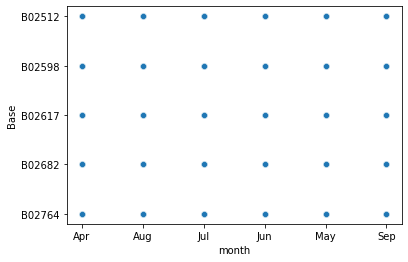

In [ ]:
sns.scatterplot(x='month',y='Base',data=uber);                         # we have a strong correlation between ‘Weekday’ and ‘Base’, 
                                                                         # impling that as customer on the day, travelled to which Base Centre.

## **MODULE I : HOW MANY TRIPS UBER COMPLETED OVER THE MONTHS OF 2014**

Total Completed Trips :  4534327
Apr     564516
Aug     829275
Jul     796121
Jun     663844
May     652435
Sep    1028136
Name: month, dtype: int64


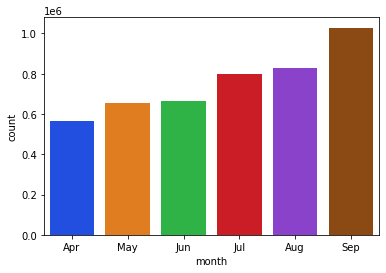

In [ ]:
# MODULE I : HOW MANY TRIPS UBER COMPLETED OVER THE YEARS

print("Total Completed Trips : ", uber.weekday.count())
print(uber.month.value_counts().sort_index(ascending=True))
sns.countplot(data=uber, x='month',order=['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'], palette='bright')

# **MODULE II :  Total Number Of Rides for The Weekdays for Each Individual Month**

In [ ]:
# Total Number Of Rides for The Weekdays for Each Individual Month
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [ ]:
daily_rides = uber.groupby(['month','weekday'])['Base'].count()
daily_rides = daily_rides.reset_index()
daily_rides.head()

,month,weekday,Base
0,Apr,Fri,90303
1,Apr,Mon,60861
2,Apr,Sat,77218
3,Apr,Sun,51251
4,Apr,Thu,85067


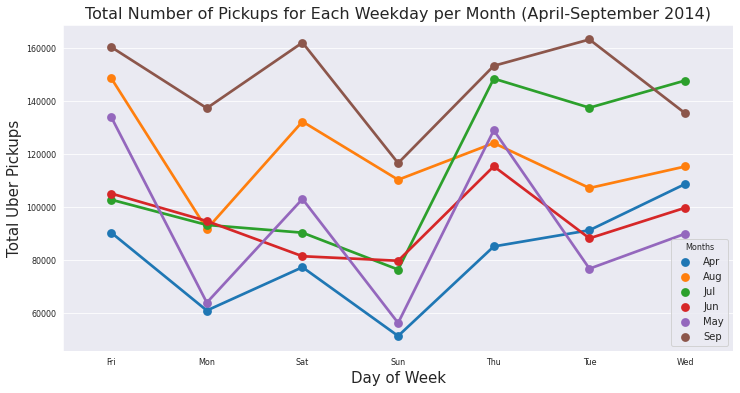

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

ax = sns.pointplot(x="weekday", y="Base", hue="month", data=daily_rides)
handles,labels = ax.get_legend_handles_labels()

ax.set_xlabel('Day of Week', fontsize = 15)
ax.set_ylabel('Total Uber Pickups', fontsize = 15)
ax.set_title('Total Number of Pickups for Each Weekday per Month (April-September 2014)', fontsize=16)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc=0, title='Months', prop={'size':10})
ax.get_legend().get_title().set_fontsize('8')
plt.show()

# **MODULE III : Count The Rides For Every Hour Of Everyday In The Months**

In [ ]:
uber['time'] =  uber['date_time'].dt.time
uber['hour'] = uber['date_time'].dt.hour
uber.head()

,date_time,Lat,Lon,Base,year,month,weekday,time,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,Apr,Tue,00:11:00,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,Apr,Tue,00:17:00,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,Apr,Tue,00:21:00,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,Apr,Tue,00:28:00,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,Apr,Tue,00:33:00,0


In [ ]:
hourly_ride = uber.groupby(['month','hour','weekday'])['Base'].count()
hourly_ride = hourly_ride.reset_index()
hourly_ride = hourly_ride.rename(columns = {'Base':'RideCount'})
hourly_ride.head()

,month,hour,weekday,RideCount
0,Apr,0,Fri,1367
1,Apr,0,Mon,518
2,Apr,0,Sat,3027
3,Apr,0,Sun,4542
4,Apr,0,Thu,792


**For Eg. Let's Pick the Month of August**

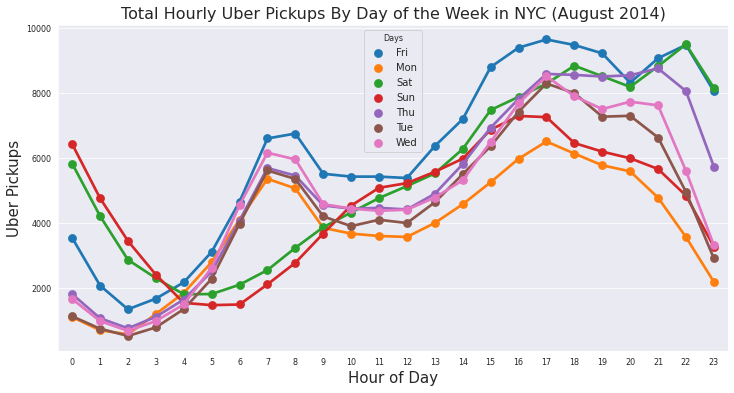

In [ ]:
aug_hourly_data = hourly_ride[hourly_ride.month == 'Aug']

fig = plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

ax = sns.pointplot(x="hour", y="RideCount", hue="weekday", data=aug_hourly_data)
handles,labels = ax.get_legend_handles_labels()
ax.set_xlabel('Hour of Day', fontsize = 15)
ax.set_ylabel('Uber Pickups', fontsize = 15)
ax.set_title('Total Hourly Uber Pickups By Day of the Week in NYC (August 2014)', fontsize=16)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc=0, title="Days", prop={'size':10})
ax.get_legend().get_title().set_fontsize('8')
plt.show()

# **MODULE IV : Hourly Averages of Pickups Each Weekday**

In [ ]:
weekday_hourly_avg = hourly_ride.groupby(['weekday','hour'])['RideCount'].mean()
weekday_hourly_avg = weekday_hourly_avg.reset_index()
weekday_hourly_avg = weekday_hourly_avg.rename(columns = {'RideCount':'AverageRides'})
weekday_hourly_avg = weekday_hourly_avg.sort_index()
weekday_hourly_avg.head()

,weekday,hour,AverageRides
0,Fri,0,2286.000000
1,Fri,1,1360.500000
2,Fri,2,891.666667
3,Fri,3,1155.000000
4,Fri,4,1467.666667


In [ ]:
weekday_hourly_avg.weekday.value_counts()

Sat    24
Fri    24
Mon    24
Tue    24
Thu    24
Sun    24
Wed    24
Name: weekday, dtype: int64

# **MODULE V : Distribution of Uber pickups Based on the Bases**

In [ ]:
uber.Base.value_counts()

B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
Name: Base, dtype: int64

In [ ]:
base_names = {"Base": {'B02617':'Weiter', 'B02598':'Hinter','B02682':'Schmecken','B02764':'Danach-NY','B02512':'Unter'}}
uber_bases = uber.copy()
uber_bases.replace(base_names, inplace=True)
uber_bases.head()

,date_time,Lat,Lon,Base,year,month,weekday,time,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,Unter,2014,Apr,Tue,00:11:00,0
1,2014-04-01 00:17:00,40.7267,-74.0345,Unter,2014,Apr,Tue,00:17:00,0
2,2014-04-01 00:21:00,40.7316,-73.9873,Unter,2014,Apr,Tue,00:21:00,0
3,2014-04-01 00:28:00,40.7588,-73.9776,Unter,2014,Apr,Tue,00:28:00,0
4,2014-04-01 00:33:00,40.7594,-73.9722,Unter,2014,Apr,Tue,00:33:00,0


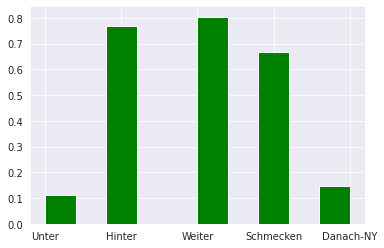

In [ ]:
plt.hist(x=uber_bases['Base'], density=1, color='green')
plt.show()

# **MODULE VI : Heat Map of Total Pickups over the 6 Months**

In [ ]:
pip install -q https://github.com/matplotlib/basemap/archive/master.zip

     | 133.1 MB 109.0 MB/s
     |████████████████████████████████| 6.6 MB 5.1 MB/s 
     |████████████████████████████████| 219 kB 19.0 MB/s 


In [ ]:
pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8 MB 5.1 MB/s 


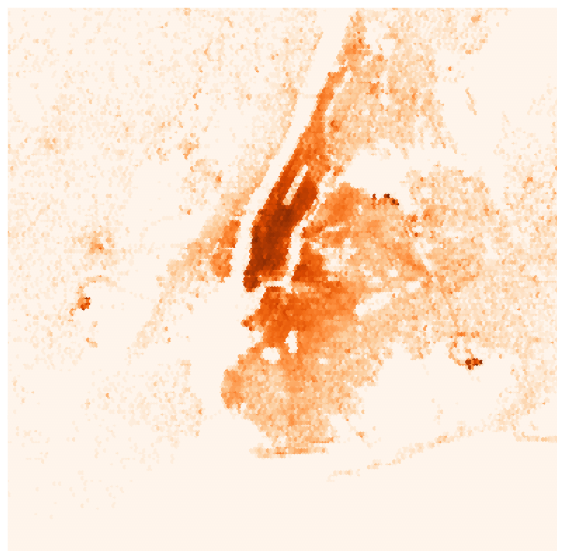

In [ ]:
from mpl_toolkits.basemap import Basemap

west, south, east, north = -74.26, 40.50, -73.70, 40.92

fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(111)

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north, llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')

x, y = m(uber['Lon'].values, uber['Lat'].values)
m.hexbin(x, y, gridsize=1000, bins='log', cmap='Oranges');

# **MODULE VII : No. of Pickups that occur within 50 meters on August 2014**

In [ ]:
pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28581 sha256=8e5ca244e56c2e899e23993cc08cf933f62303b50656a2ad9248cb597c33fe24
  Stored in directory: /root/.cache/pip/wheels/6b/f5/21/cdd12e476182b4b0b98326cdb9efa02ddbd5d87ca5de051c84
Successfully built mplleaflet


In [ ]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [ ]:
def get_hot_spots(max_distance, min_cars, ride_data):
  coords = ride_data[['Lat', 'Lon']].to_numpy()
  kms_per_radian = 6371.0088
  epsilon = max_distance / kms_per_radian

  db = DBSCAN(eps=epsilon, min_samples=min_cars, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    
  cluster_labels = db.labels_
  num_clusters = len(set(cluster_labels))
  clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
    
  print('Number of clusters: {}'.format(num_clusters))

  lat = []
  lon = []
  num_members = []
    
  for ii in range(len(clusters)):
    if clusters[ii].any():
      lat.append(MultiPoint(clusters[ii]).centroid.x)
      lon.append(MultiPoint(clusters[ii]).centroid.y)
      num_members.append(len(clusters[ii]))
            
  hot_spots = [lon,lat,num_members]
  return hot_spots

In [ ]:
ride_data = uber_bases.loc[(uber_bases['month'] == 'Aug') & (uber_bases['hour'] > 15)]
print(ride_data)
max_distance = 0.05
min_pickups = 25
hot_spots = get_hot_spots(max_distance, min_pickups, ride_data)

                  date_time      Lat      Lon  ... weekday      time hour
565194  2014-08-01 16:02:00  40.7318 -73.9950  ...     Fri  16:02:00   16
565195  2014-08-01 16:03:00  40.7546 -73.9814  ...     Fri  16:03:00   16
565196  2014-08-01 16:05:00  40.7728 -73.9896  ...     Fri  16:05:00   16
565197  2014-08-01 16:06:00  40.7503 -73.9752  ...     Fri  16:06:00   16
565198  2014-08-01 16:06:00  40.7320 -73.9922  ...     Fri  16:06:00   16
...                     ...      ...      ...  ...     ...       ...  ...
1393786 2014-08-31 23:55:00  40.7552 -73.9753  ...     Sun  23:55:00   23
1393787 2014-08-31 23:55:00  40.7552 -73.9753  ...     Sun  23:55:00   23
1393788 2014-08-31 23:55:00  40.7617 -73.9788  ...     Sun  23:55:00   23
1393789 2014-08-31 23:59:00  40.7395 -73.9889  ...     Sun  23:59:00   23
1393790 2014-08-31 23:59:00  40.7270 -73.9802  ...     Sun  23:59:00   23

[401646 rows x 9 columns]
Number of clusters: 423


**From the data, there are 423 cluster all around NYC meeting the criteria.** 

**Let’s plot it out to visualize it.**

In [ ]:
import mplleaflet

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

color_scale = np.log(hot_spots[2])

plt.scatter(hot_spots[0], hot_spots[1],s=80,c=color_scale,cmap=cm.autumn)
mplleaflet.display() 